In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

In [ ]:
df = pd.read_excel('meteo.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    407 non-null    datetime64[ns]
 1   tavg    407 non-null    float64       
 2   tmin    407 non-null    float64       
 3   tmax    406 non-null    float64       
 4   prcp    407 non-null    float64       
 5   snow    1 non-null      float64       
 6   wdir    406 non-null    float64       
 7   wspd    406 non-null    float64       
 8   wpgt    0 non-null      float64       
 9   pres    406 non-null    float64       
 10  tsun    0 non-null      float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 35.1 KB


In [ ]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2022-01-02,4.9,-0.1,12.0,0.0,NaN,313.0,2.4,NaN,1025.3,NaN
1,2022-01-03,3.7,1.3,5.0,0.0,NaN,8.0,1.8,NaN,1020.6,NaN
2,2022-01-04,5.6,4.0,8.4,0.0,NaN,129.0,2.7,NaN,1012.4,NaN
3,2022-01-05,9.9,6.8,16.0,0.5,NaN,153.0,7.6,NaN,1001.7,NaN
4,2022-01-06,5.9,4.0,9.2,38.1,NaN,291.0,13.9,NaN,1011.9,NaN


In [ ]:
df_meteo = df.drop(columns =['tmin', 'tmax', 'snow','wspd', 'wpgt', 'tsun', 'pres', 'wdir', 'tavg'])

In [ ]:
df_meteo.head()

,time,prcp
0,2022-01-02,0.0
1,2022-01-03,0.0
2,2022-01-04,0.0
3,2022-01-05,0.5
4,2022-01-06,38.1


In [ ]:
df_meteo['time'] = pd.to_datetime(df_meteo['time'])

In [ ]:
df_meteo =df_meteo.set_index('time')

In [ ]:
df_meteo

,prcp
time,
2022-01-02,0.0
2022-01-03,0.0
2022-01-04,0.0
2022-01-05,0.5
2022-01-06,38.1
...,...
2023-02-08,6.0
2023-02-09,1.4
2023-02-10,0.0


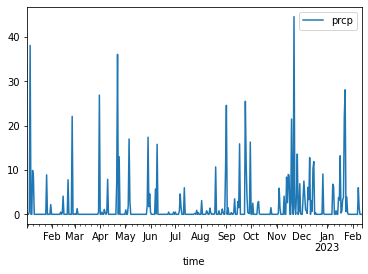

In [ ]:
df_meteo.plot();

array([<AxesSubplot:xlabel='time'>], dtype=object)

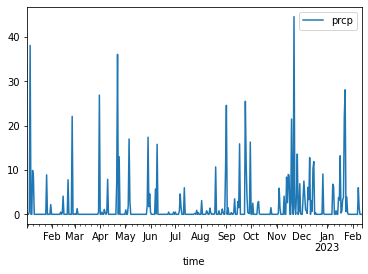

In [ ]:
df_meteo.plot(subplots = True)

In [ ]:
df_meteo['prcp']= df_meteo['prcp'].fillna(method = 'ffill')


In [ ]:
data = pd.read_excel('dati.xlsx',
                    index_col='Calendario',
                    parse_dates=True
                    )
data

df_burger=data[data['Categoria']=='Burger']
df_burger

,Categoria,Quantita
Calendario,,
2022-01-02,Burger,50.00
2022-01-10,Burger,1.00
2022-01-11,Burger,27.00
2022-01-12,Burger,48.00
2022-01-13,Burger,26.00
...,...,...
2023-02-08,Burger,60.00
2023-02-09,Burger,75.00
2023-02-10,Burger,116.93


In [ ]:
df_burger = df_burger.drop(columns =['Categoria'])

In [ ]:
df_unione=pd.merge(df_burger,df_meteo, how='inner', left_index=True, right_index=True)
df_unione.index.name="time"
df_unione.head()

,Quantita,prcp
time,,
2022-01-02,50.0,0.0
2022-01-10,1.0,8.4
2022-01-11,27.0,0.0
2022-01-12,48.0,0.0
2022-01-13,26.0,0.0


In [ ]:
df_unione = df_unione.reset_index()[['time','Quantita','prcp']].rename({'time':'ds','Quantita':'y','prcp':'prcp'}, axis='columns')
df_unione

,ds,y,prcp
0,2022-01-02,50.00,0.0
1,2022-01-10,1.00,8.4
2,2022-01-11,27.00,0.0
3,2022-01-12,48.00,0.0
4,2022-01-13,26.00,0.0
...,...,...,...
388,2023-02-08,60.00,6.0
389,2023-02-09,75.00,1.4
390,2023-02-10,116.93,0.0
391,2023-02-11,152.22,0.0


In [ ]:
df_unione['month']= df_unione['ds'].dt.month

In [ ]:
df_unione[['month','prcp']].groupby('month').agg({'prcp':{'max','min','mean'}})

prcp                
       min   max      mean
month                     
1      0.0  28.1  2.157407
2      0.0  22.1  1.055000
3      0.0  26.9  0.929032
4      0.0  36.1  2.216667
5      0.0  17.4  1.570968
6      0.0  15.8  0.770000
7      0.0   6.0  0.487097
8      0.0  10.7  1.048148
9      0.0  25.5  3.616667
10     0.0   2.9  0.303226
11     0.0  44.6  4.782143
12     0.0  12.8  2.526667

In [ ]:
maxs = df_unione.max()
maxs

ds       2023-02-12 00:00:00
y                     175.91
prcp                    44.6
month                     12
dtype: object

In [ ]:
df_unione[['y','prcp']].corr()

,y,prcp
y,1.000000,0.023968
prcp,0.023968,1.000000


In [ ]:
df_unione.query('prcp>26')[['y','prcp']].corr()

,y,prcp
y,1.000000,0.939992
prcp,0.939992,1.000000


In [ ]:
def pioggia(prcp):
  if prcp>26:
    return 1
  else:
    return 0

In [ ]:
df_unione['pioggia'] = df_unione['prcp'].apply(pioggia)
df_unione['month_bins'] = pd.cut(df_unione['month'],bins=3,labels=False)
df_unione

,ds,y,prcp,month,pioggia,month_bins
0,2022-01-02,50.00,0.0,1,0,0
1,2022-01-10,1.00,8.4,1,0,0
2,2022-01-11,27.00,0.0,1,0,0
3,2022-01-12,48.00,0.0,1,0,0
4,2022-01-13,26.00,0.0,1,0,0
...,...,...,...,...,...,...
388,2023-02-08,60.00,6.0,2,0,0
389,2023-02-09,75.00,1.4,2,0,0
390,2023-02-10,116.93,0.0,2,0,0
391,2023-02-11,152.22,0.0,2,0,0


In [ ]:
train = df_unione[(df_unione['ds']>='2022-01-01') & (df_unione['ds']<='2022-11-30')]
test = df_unione[(df_unione['ds']>'2022-11-30')]


In [ ]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True,
                #monthly_seasonality=True,
                weekly_seasonality=True,
                )

# add regressor
#model.add_regressor('prcp',standardize=False)
#model.add_regressor('tavg',standardize=False)


model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjni3yud/g51yxnlb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjni3yud/suus0hd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16548', 'data', 'file=/tmp/tmpdjni3yud/g51yxnlb.json', 'init=/tmp/tmpdjni3yud/suus0hd9.json', 'output', 'file=/tmp/tmpdjni3yud/prophet_modelrvmv28uh/prophet_model-20230227085021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:50:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=73)
future.tail()

,ds
388,2023-02-07
389,2023-02-08
390,2023-02-09
391,2023-02-10
392,2023-02-11


In [ ]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
388,2023-02-07,55.188396,17.140445,90.141443
389,2023-02-08,62.079930,25.459370,100.062983
390,2023-02-09,53.420502,17.453285,92.803618
391,2023-02-10,77.785273,41.618145,117.110573
392,2023-02-11,91.836115,55.780453,127.908962


In [ ]:
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout(
                  yaxis_title="Quantità burger",
                  xaxis_title="Data",
                  title="Burger venduti",
                  )

fig

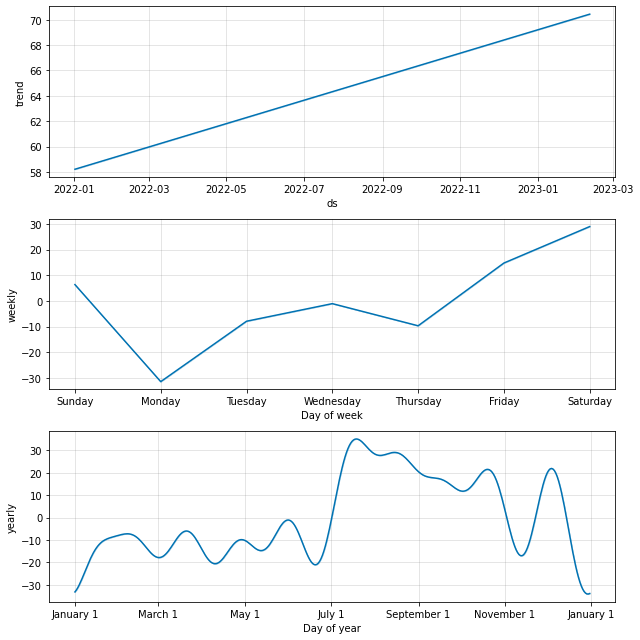

In [ ]:
fig2 = model.plot_components(forecast)